In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Zomato.csv')
df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.'), ('Rated 4.0', 'RATED\n I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers'), ('Rated 2.0', 'RATED\n Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetarians. Anyways we ordered ala carte items which took ages to come. Food was ok ok. Definitely not visiting anymore.'), ('Rated 4.0', 'RATED\n We went here on a weekend and one of us had the buffet while two of us took Ala Carte. Firstly the ambience and service of this place is great! The buffet had a lot of items and the good was good. We had a Pumpkin Halwa intm the dessert which was amazing. Must try! The kulchas are great here. Cheers!'), ('Rated 5.0', 'RATED\n The best thing about the place is itÃ\x83Ã\x83Ã\x82Ã\x82Ã\x83Ã\x82Ã\x82Ã\x92s ambiance. Second best thing was yummy ? food. We try buffet and buffet food was not disappointed us.\nTest ?. ?? ?? ?? ?? ??\nQuality ?. ??????????.\nService: Staff was very professional and friendly.\n\nOverall experience was excellent.\n\nsubirmajumder85.wixsite.com'), ('Rated 5.0', 'RATED\n Great food and pleasant ambience. Expensive but Coll place to chill and relax......\n\nService is really very very good and friendly staff...\n\nFood : 5/5\nService : 5/5\nAmbience :5/5\nOverall :5/5'), ('Rated 4.0', 'RATED\n Good ambience with tasty food.\nCheese chilli paratha with Bhutta palak methi curry is a good combo.\nLemon Chicken in the starters is a must try item.\nEgg fried rice was also quite tasty.\nIn the mocktails, recommend ""Alice in Junoon"". Do not miss it.'), ('Rated 4.0', 'RATED\n You canÃ\x83Ã\x83Ã\x82Ã\x82Ã\x83Ã\x82Ã\x82Ã\x92t go wrong with Jalsa. Never been a fan of their buffet and thus always order alacarteÃ\x83Ã\x83Ã\x82Ã\x82Ã\x83Ã\x82Ã\x82Ã\x92. Service at times can be on the slower side but food is worth the wait.'), ('Rated 5.0', 'RATED\n Overdelighted by the service and food provided at this place. A royal and ethnic atmosphere builds a strong essence of being in India and also the quality and taste of food is truly authentic. I would totally recommend to visit this place once.'), ('Rated 4.0', 'RATED\n The place is nice and comfortable. Food wise all jalea outlets maintain a good standard. The soya chaap was a standout dish. Clearly one of trademark dish as per me and a must try.\n\nThe only concern is the parking. It very congested and limited to just 5cars. The basement parking is very steep and makes it cumbersome'), ('Rated 4.0', 'RATED\n The place is nice and comfortable.

In [3]:
df=df.drop(['url','address','phone','reviews_list','menu_item','dish_liked'],axis=1)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Hotel &...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [4]:
df.shape

(51717, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [6]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.drop_duplicates(inplace=True)
df.shape


(51609, 11)

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
def handlerate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')[0]
        return float(value)

In [10]:
df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [11]:
df.rate.isnull().sum()

10019

In [12]:
df.describe()

,rate,votes
count,41590.000000,51609.000000
mean,3.700142,283.283361
std,0.440451,803.282771
min,1.800000,0.000000
25%,3.400000,7.000000
50%,3.700000,41.000000
75%,4.000000,198.000000
max,4.900000,16832.000000


In [13]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

0

In [14]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [15]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df.rename(columns={'approx_cost(for two people)':'costfor2person','listed_in(type)':'Type','listed_in(city)':'listescity'},inplace=True)

In [17]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type,listescity
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [18]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [19]:
df['listescity'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [20]:
df=df.drop(['listescity'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [21]:
df['costfor2person'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [23]:
rest_type=df['rest_type'].value_counts()

In [24]:
rest_type_less_than_1000=rest_type[rest_type<1000]
rest_type_less_than_1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [28]:
def handlerest(value):
    if value in rest_type_less_than_1000:
        return 'others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(handlerest)
df['rest_type'].value_counts()
    

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [29]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [30]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [31]:
location=df['location'].value_counts()

In [37]:
location_300=location[location<300]
location_300

Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                          78
S

In [38]:
def handleloc(value):
    if value in location_300:
        return 'other'
    else:
        return value
df['location']=df['location'].apply(handleloc)
df['location'].value_counts()

other                    18998
BTM                       5056
HSR                       2494
Koramangala 5th Block     2479
JP Nagar                  2218
Whitefield                2105
Indiranagar               2026
Jayanagar                 1916
Marathahalli              1805
Bannerghatta Road         1609
Bellandur                 1268
Electronic City           1246
Koramangala 1st Block     1236
Brigade Road              1210
Koramangala 7th Block     1174
Koramangala 6th Block     1127
Sarjapur Road             1047
Koramangala 4th Block     1017
Ulsoor                    1011
Name: location, dtype: int64

In [39]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,other,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,other,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,other,others,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,other,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,other,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [46]:
cuisines=df['cuisines'].value_counts()
cuisines

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [1]:
cus100=cuisines[cuisines<100]
cus100

NameError: name 'cuisines' is not defined

In [52]:
def handlecus(value):
    if value in cus100:
        return 'other'
    else:
        return value
df['cuisines']=df['cuisines'].apply(handlecus)
df['cuisines'].value_counts()

other                                  26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [53]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,other,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,other,Casual Dining,other,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,other,others,other,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,other,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,other,Casual Dining,other,600,Buffet


C:\Users\NINAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

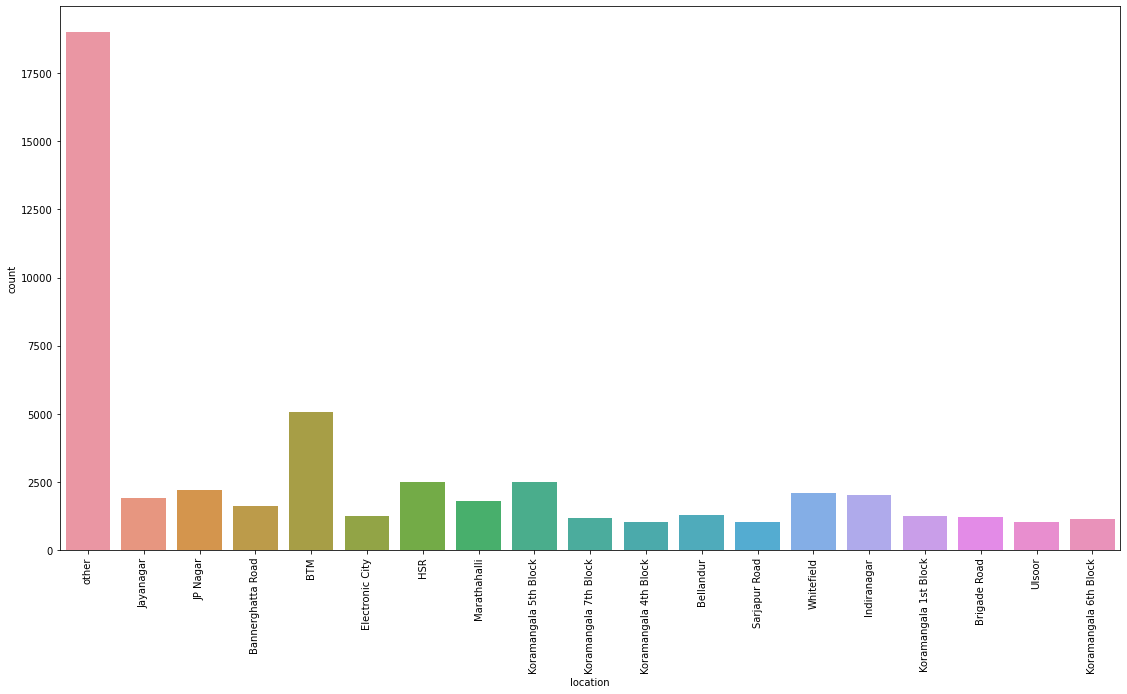

In [65]:
plt.figure(figsize=(19,10))
sns.countplot(df["location"])
plt.xticks(rotation=90)

C:\Users\NINAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


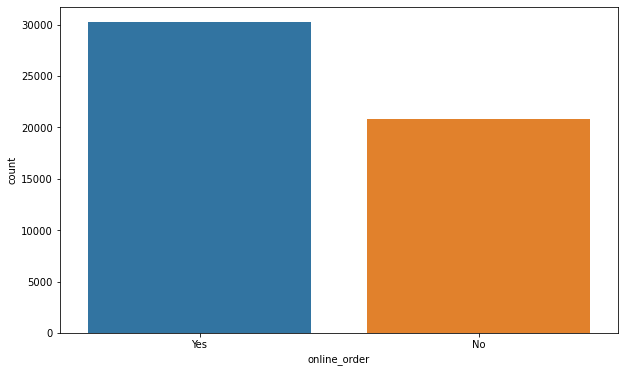

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(df["online_order"])

C:\Users\NINAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


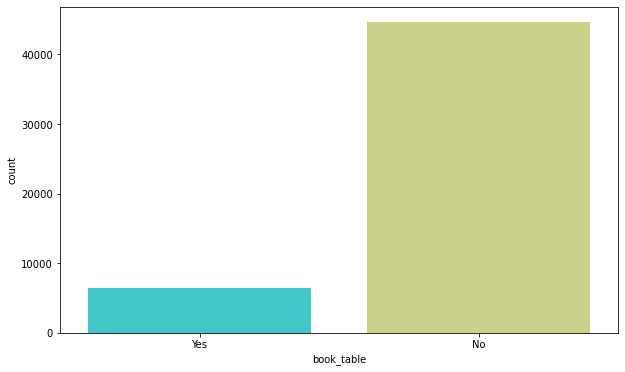

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(df["book_table"],palette='rainbow')

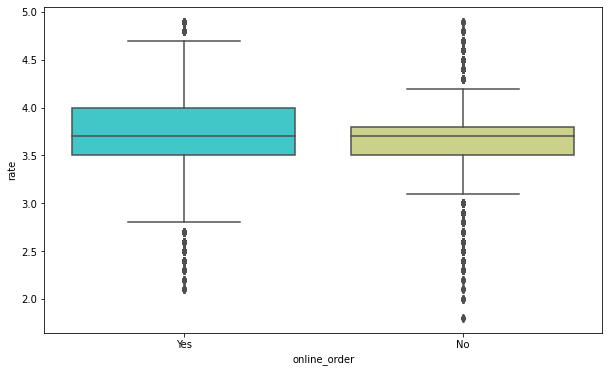

In [70]:
plt.figure(figsize=(10,6))
sns.boxplot(x='online_order',y='rate',data=df,palette='rainbow')

In [71]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,other,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,other,Casual Dining,other,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,other,others,other,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,other,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,other,Casual Dining,other,600,Buffet


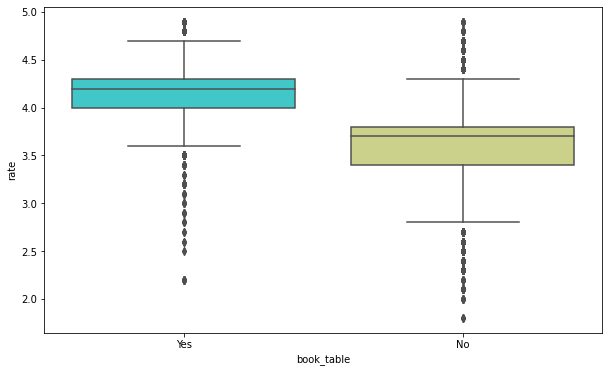

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x='book_table',y='rate',data=df,palette='rainbow')

In [85]:
df1=df.groupby(['location','online_order'])['online_order'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,index=['location'],columns=['online_order'])
df1

online_order.1       
online_order                      No    Yes
location                                   
BTM                             1763   3293
Bannerghatta Road                685    924
Bellandur                        517    751
Brigade Road                     552    658
Electronic City                  676    570
HSR                              584   1910
Indiranagar                      697   1329
JP Nagar                         911   1307
Jayanagar                        552   1364
Koramangala 1st Block            384    852
Koramangala 4th Block            459    558
Koramangala 5th Block            866   1613
Koramangala 6th Block            445    682
Koramangala 7th Block            389    785
Marathahalli                     701   1104
Sarjapur Road                    323    724
Ulsoor                           389    622
Whitefield                       986   1119
other                           8935  10063

In [84]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,other,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,other,Casual Dining,other,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,other,others,other,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,other,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,other,Casual Dining,other,600,Buffet


In [89]:
df2=df.groupby(['location','book_table'])['book_table'].count()
df2.to_csv('location_tables.csv')
df2=pd.read_csv('location_tables.csv')
df2=pd.pivot_table(df2,index=['location'],columns=['book_table'])
df2

book_table.1      
book_table                      No   Yes
location                                
BTM                           4889   167
Bannerghatta Road             1510    99
Bellandur                     1170    98
Brigade Road                  1034   176
Electronic City               1148    98
HSR                           2277   217
Indiranagar                   1578   448
JP Nagar                      1903   315
Jayanagar                     1637   279
Koramangala 1st Block         1186    50
Koramangala 4th Block          695   322
Koramangala 5th Block         1787   692
Koramangala 6th Block         1015   112
Koramangala 7th Block         1012   162
Marathahalli                  1642   163
Sarjapur Road                  893   154
Ulsoor                         834   177
Whitefield                    1852   253
other                        16564  2434

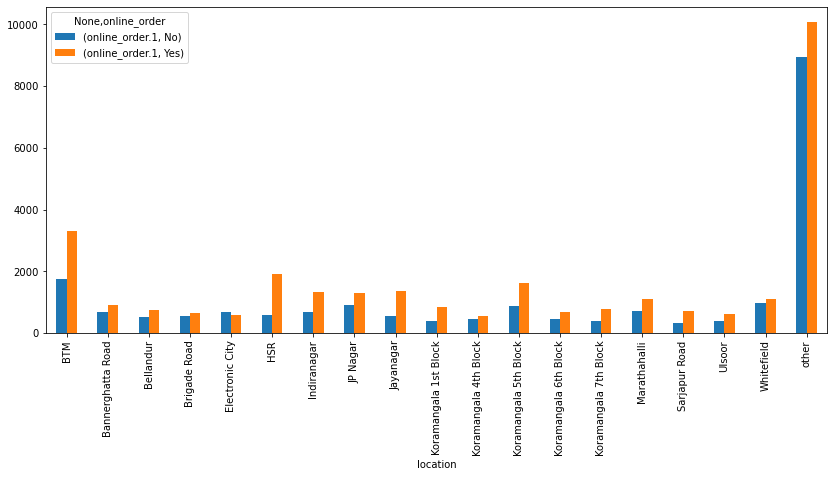

In [95]:
df1.plot(kind='bar',figsize=(14,6))

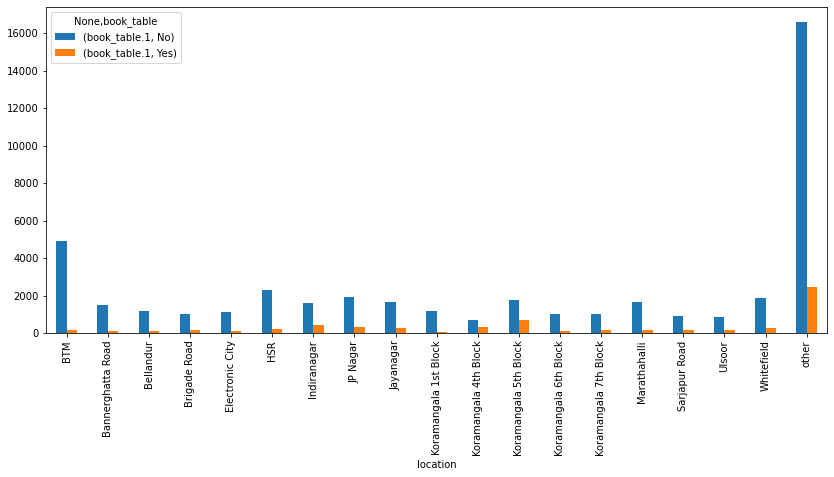

In [94]:
df2.plot(kind='bar',figsize=(14,6))

In [96]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,other,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,other,Casual Dining,other,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,other,others,other,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,other,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,other,Casual Dining,other,600,Buffet


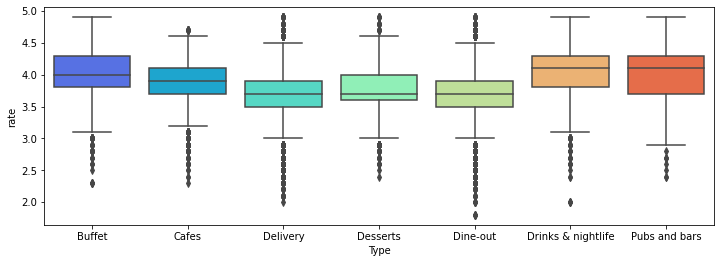

In [104]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Type',y='rate',data=df,palette='rainbow')

In [113]:
df3=df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_type.csv')
df3=pd.read_csv('location_type.csv')
df3=pd.pivot_table(df3,index=['location'],columns=['Type'])
df3

name                                    \
Type                  Buffet  Cafes Delivery Desserts Dine-out   
location                                                         
BTM                     21.0   83.0   3053.0    198.0   1660.0   
Bannerghatta Road        9.0   46.0    828.0    137.0    578.0   
Bellandur               28.0   36.0    617.0     75.0    479.0   
Brigade Road            25.0   46.0    497.0    108.0    455.0   
Electronic City         23.0   24.0    570.0     71.0    516.0   
HSR                     19.0   49.0   1694.0    120.0    580.0   
Indiranagar             38.0   97.0   1091.0    140.0    529.0   
JP Nagar                45.0   76.0   1151.0    166.0    722.0   
Jayanagar               27.0   77.0   1043.0    182.0    575.0   
Koramangala 1st Block    3.0   26.0    716.0     70.0    398.0   
Koramangala 4th Block   21.0   53.0    464.0     81.0    302.0   
Koramangala 5th Block   65.0  146.0   1075.0    209.0    842.0   
Koramangala 6th Block   18.0   43.0    511.0     70.0    411.0   
Koramangala 7th Block   25.0   52.0    503.0    127.0    417.0   
Marathahalli            34.0   32.0    980.0    105.0    630.0   
Sarjapur Road           25.0   22.0    558.0     82.0    319.0   
Ulsoor                  16.0   56.0    456.0     71.0    359.0   
Whitefield              28.0   51.0   1041.0    137.0    768.0   
other                  399.0  688.0   8731.0   1410.0   7022.0   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                 22.0          19.0  
Bannerghatta Road                    9.0           2.0  
Bellandur                           17.0          16.0  
Brigade Road                        57.0          22.0  
Electronic City                     21.0          21.0  
HSR                                 14.0          18.0  
Indiranagar                         65.0          66.0  
JP Nagar                            51.0           7.0  
Jayanagar                           12.0           NaN  
Koramangala 1st Block                7.0          16.0  
Koramangala 4th Block               62.0          34.0  
Koramangala 5th Block               84.0          58.0  
Koramangala 6th Block               51.0          23.0  
Koramangala 7th Block               25.0          25.0  
Marathahalli                        22.0           2.0  
Sarjapur Road                       19.0          22.0  
Ulsoor                              23.0          30.0  
Whitefield                          47.0          33.0  
other                              476.0         272.0

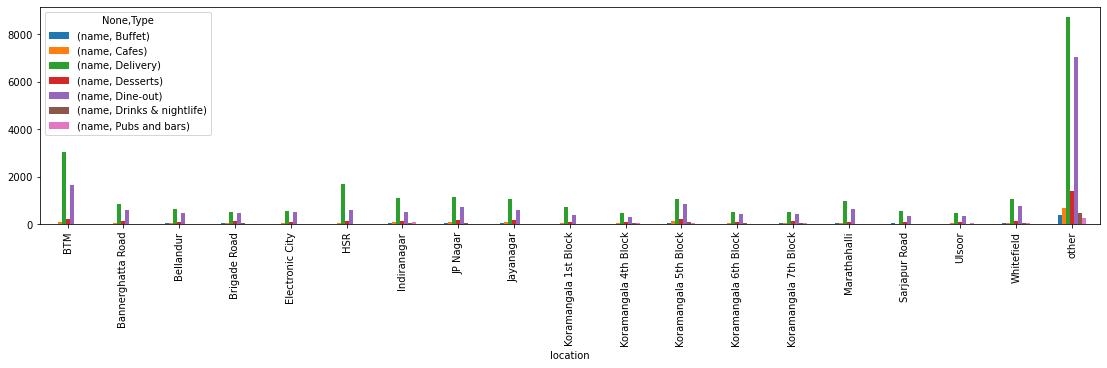

In [120]:
df3.plot(kind='bar',figsize=(19,4))

In [122]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,other,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet


In [133]:
df4=df[['location','votes']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum()
df5

location
BTM                       573668
Bannerghatta Road         214989
Bellandur                 205308
Brigade Road              426682
Electronic City           110774
HSR                       498322
Indiranagar              1165909
JP Nagar                  586522
Jayanagar                 487044
Koramangala 1st Block     251681
Koramangala 4th Block     685156
Koramangala 5th Block    2214083
Koramangala 6th Block     463503
Koramangala 7th Block     488225
Marathahalli              434235
Sarjapur Road             398599
Ulsoor                    180232
Whitefield                465734
other                    4671176
Name: votes, dtype: int64

In [134]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2person,Type
0,Jalsa,Yes,Yes,4.1,775,other,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet


In [137]:
df6=df[['cuisines','votes']]
df7=df6.drop_duplicates()
df7=df6.groupby(['cuisines'])['votes'].sum()
df7.head()

cuisines
Andhra              12299
Andhra, Biryani     40339
Arabian             16529
Bakery              13148
Bakery, Desserts    45464
Name: votes, dtype: int64